In [1]:
import scanpy as sc
import gseapy as gp
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#sc.logging.print_versions()

In [2]:
filename='../ann_9_17_no9m.h5ad'
adata=sc.read(filename)

In [3]:
adata

AnnData object with n_obs × n_vars = 45282 × 12841
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet', 'doublet_score', 'n_genes', 'batchn', 'sample', 'batch', 'S_score', 'G2M_score', 'phase', 'leiden0.2', 'leiden0.4', 'leiden0.6', 'leiden0.8', 'leiden1.0', 'leiden1.2', 'cell type'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell type_colors', 'hvg', 'leiden', 'leiden0.2_colors', 'leiden0.4_colors', 'leiden0.6_colors', 'leiden0.8_colors', 'leiden1.0_colors', 'leiden1.2_colors', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs['group']=adata.obs['sample'].map(lambda e: e[:-2])

In [18]:
adata.obs['cell type'].value_counts()

B cell-1          15741
T cell-1          11464
T cell-2           5091
Monocyte           4075
Macrophage-1       2916
NK cell            2630
Macrophage-2       1200
B cell-2           1005
Basophil            485
Neutrophil          445
Dendritic cell      191
Other                39
Name: cell type, dtype: int64

# Find diffgenes in each cell type

In [6]:
from collections import defaultdict
hi2v12=defaultdict(set)
lo2v12=defaultdict(set) 
#hi2v9=defaultdict(set)
#lo2v9=defaultdict(set) 
hi12v3=defaultdict(set)
lo12v3=defaultdict(set) 
#hi9v3=defaultdict(set)
#lo9v3=defaultdict(set) 

In [7]:
pcut=0.05
for cell in sorted(adata.obs['cell type'].value_counts().keys()):
    print(cell)
    celldata=adata[adata.obs['cell type']==cell,:]


    tg12v3low=set()
    tg12v3high=set()
    #tg9v3low=set()
    #tg9v3high=set()
    tg2v12low=set()
    tg2v12high=set()
    #tg2v9high=set()
    #tg2v9low=set()
    
    sc.tl.rank_genes_groups(celldata,groupby='group',groups=['Tg_3m','Tg_2m'],reference='Tg_12m',method='wilcoxon')
    
    
    for i,p in enumerate(celldata.uns['rank_genes_groups']['pvals_adj']):
        if p[0]<pcut and abs(celldata.uns['rank_genes_groups']['logfoldchanges'][i][0])>0.5:
            if celldata.uns['rank_genes_groups']['scores'][i][0]>0:
                tg12v3low.add(celldata.uns['rank_genes_groups']['names'][i][0])
            else:
                tg12v3high.add(celldata.uns['rank_genes_groups']['names'][i][0])
                
        if p[1]<pcut and abs(celldata.uns['rank_genes_groups']['logfoldchanges'][i][1])>0.5:
            if celldata.uns['rank_genes_groups']['scores'][i][1]>0:
                tg2v12high.add(celldata.uns['rank_genes_groups']['names'][i][1])
            else:
                tg2v12low.add(celldata.uns['rank_genes_groups']['names'][i][1])

    '''            
    sc.tl.rank_genes_groups(celldata,groupby='group',groups=['Tg_3m','Tg_2m'],reference='Tg_9m',method='wilcoxon')
    
    
    for i,p in enumerate(celldata.uns['rank_genes_groups']['pvals']):
        if p[0]<pcut:
            if celldata.uns['rank_genes_groups']['scores'][i][0]>0:
                tg9v3low.add(celldata.uns['rank_genes_groups']['names'][i][0])
            else:
                tg9v3high.add(celldata.uns['rank_genes_groups']['names'][i][0])
                
        if p[1]<pcut:
            if celldata.uns['rank_genes_groups']['scores'][i][1]>0:
                tg2v9high.add(celldata.uns['rank_genes_groups']['names'][i][1])
            else:
                tg2v9low.add(celldata.uns['rank_genes_groups']['names'][i][1])
    '''             
                
                
                
    hi12v3[cell]=tg12v3high
    lo12v3[cell]=tg12v3low
    hi2v12[cell]=tg2v12high
    lo2v12[cell]=tg2v12low

    
    

    




/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.


B cell-1


... storing 'group' as categorical
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical


B cell-2


/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical


Basophil


/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical


Dendritic cell
Macrophage-1


/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_n

Macrophage-2


/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical


Monocyte


/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical


NK cell


/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical


Neutrophil


/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_n

Other
T cell-1


... storing 'group' as categorical
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical


T cell-2


/home/tufeng/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


## KEGG enrich in each cell type (up in 12m(12v2) & down in 3m(12v3))

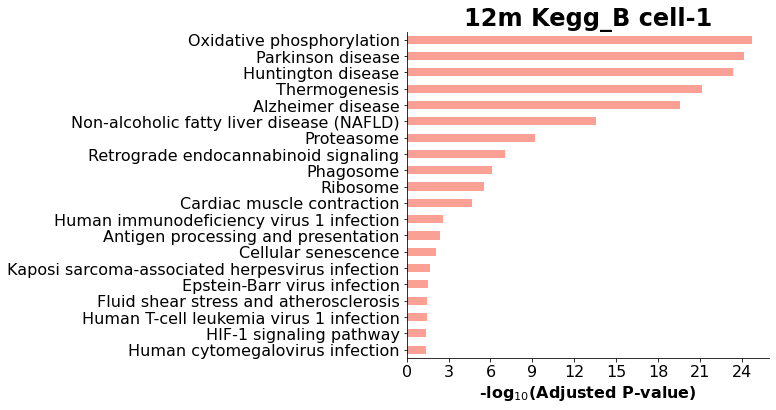

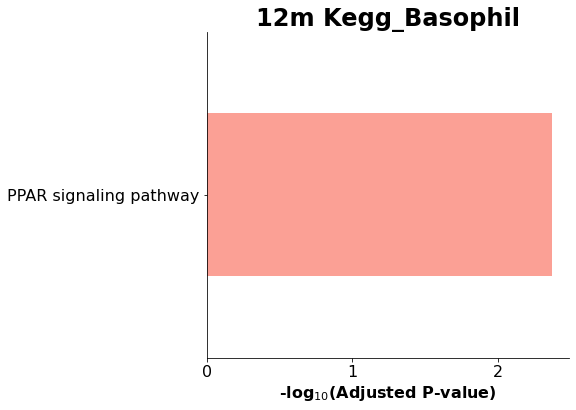

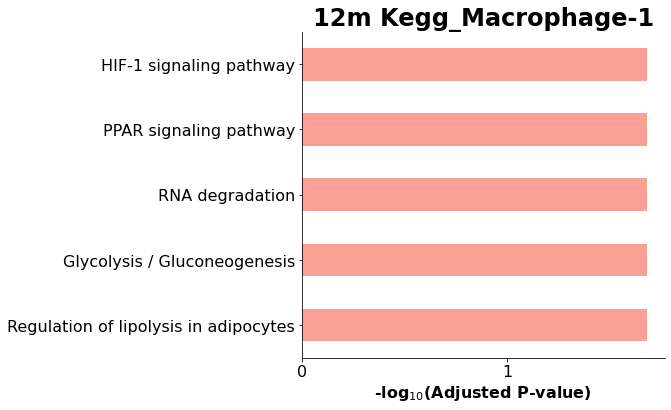

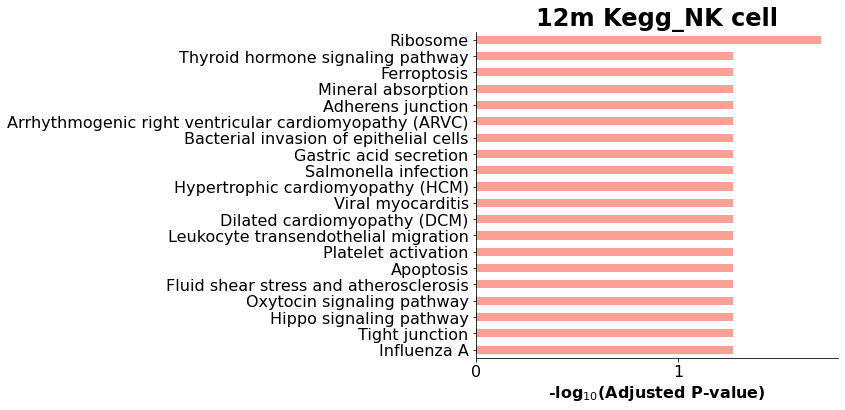

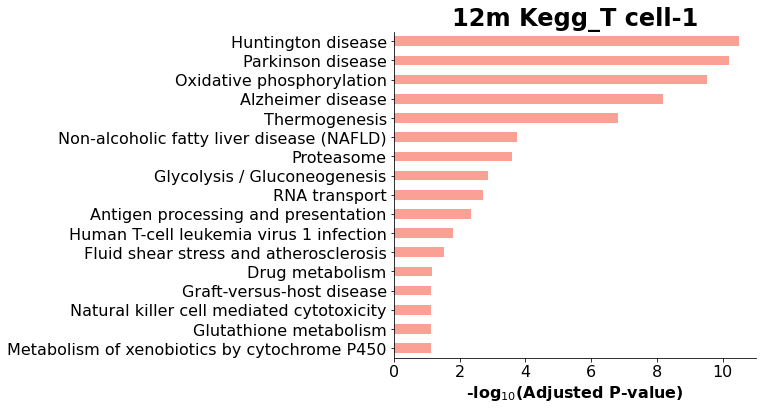

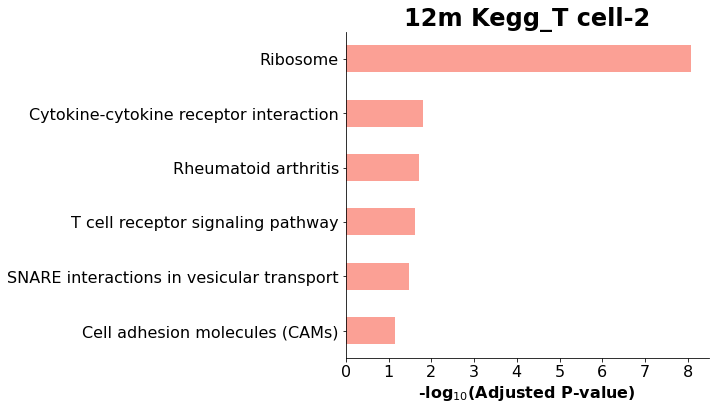

In [8]:
for cell in lo2v12.keys():
    reversehigh = lo2v12[cell]&hi12v3[cell]
    gl=list(reversehigh)
    if gl:
        enr=gp.enrichr(gene_list=gl,gene_sets=['KEGG_2019_Mouse'],organism='Mouse',outdir='gsea_test',cutoff=0.5)
        gp.plot.barplot(enr.res2d,title='12m Kegg_'+cell,cutoff=0.1,top_term=20)

## KEGG enrich in each cell type(down in 12m(12v2) & up in 3m(12v3))

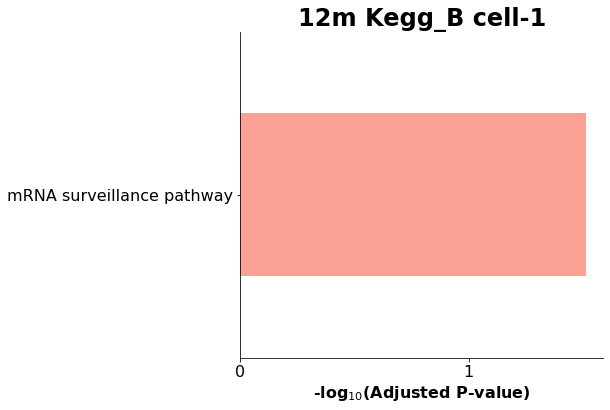

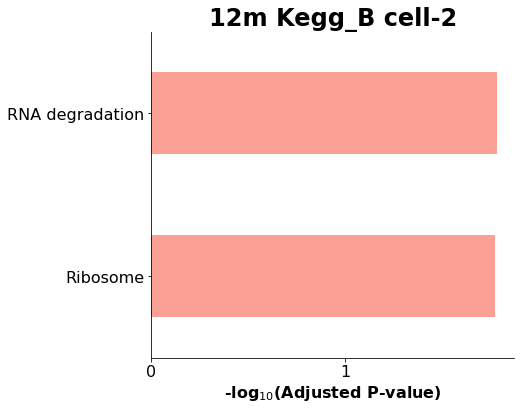

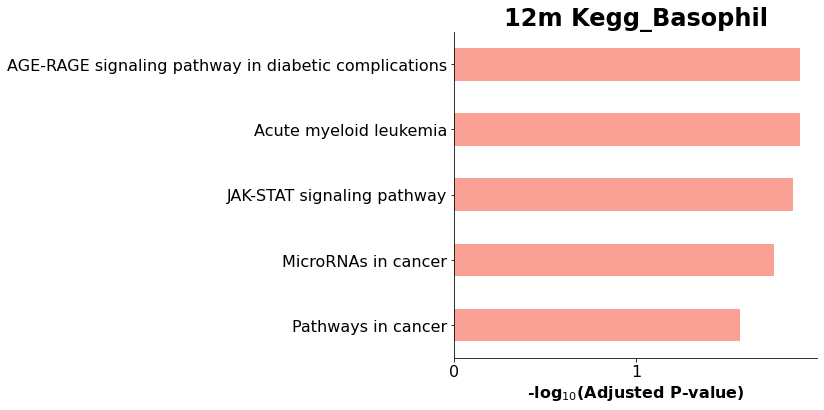

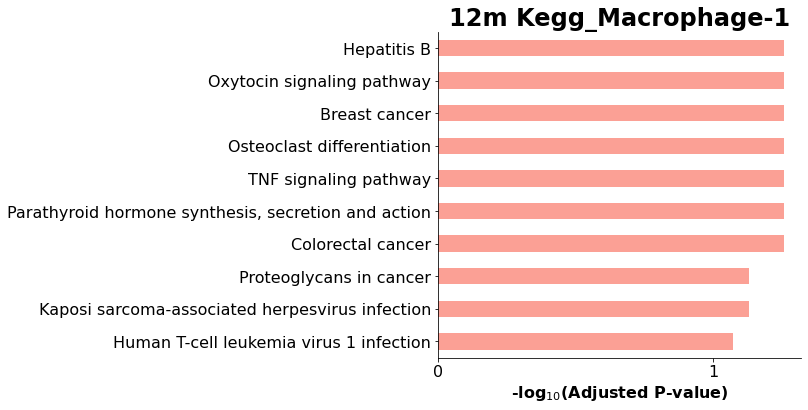

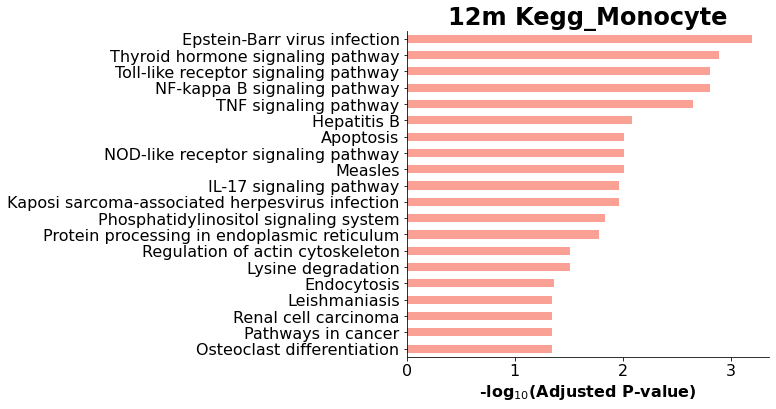

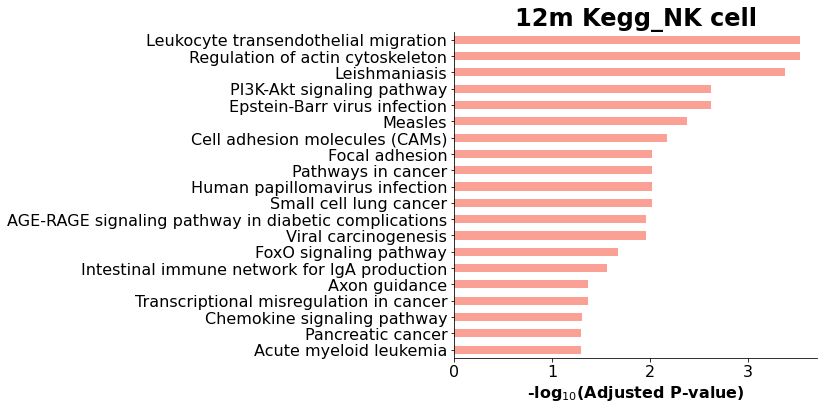

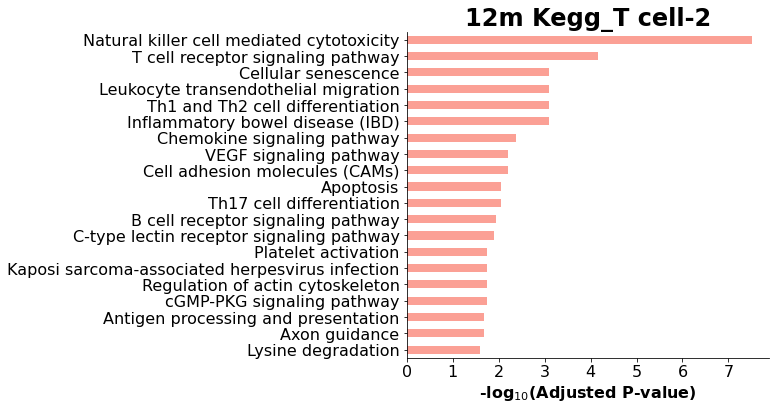

In [9]:
for cell in lo2v12.keys():
    reverselow = hi2v12[cell]&lo12v3[cell]
    gl=list(reverselow)
    if gl:
        enr=gp.enrichr(gene_list=gl,gene_sets=['KEGG_2019_Mouse'],organism='Mouse',outdir='gsea_test',cutoff=0.5)
        gp.plot.barplot(enr.res2d,title='12m Kegg_'+cell,cutoff=0.1,top_term=20)

## KEGG enrich in each cell type(all diff_gene that reversed in 3m)

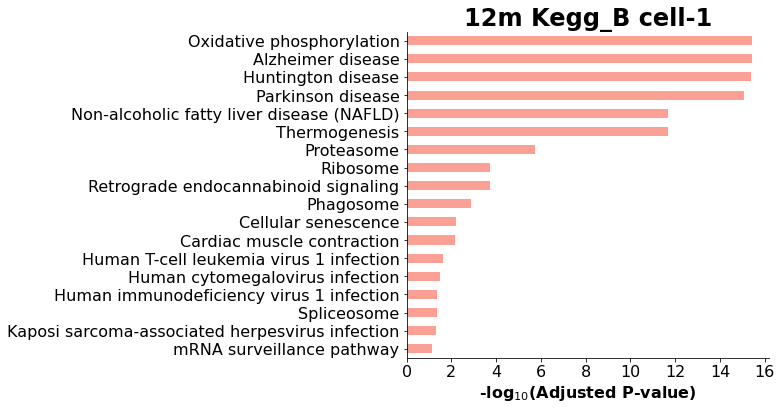

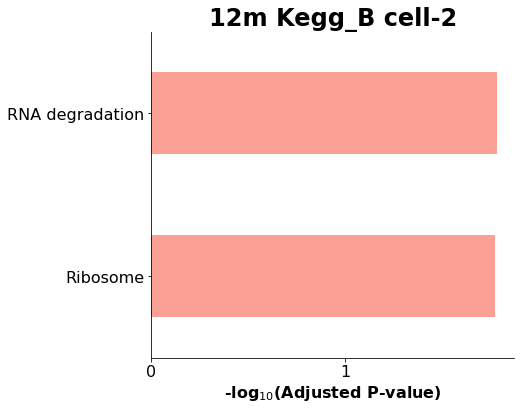

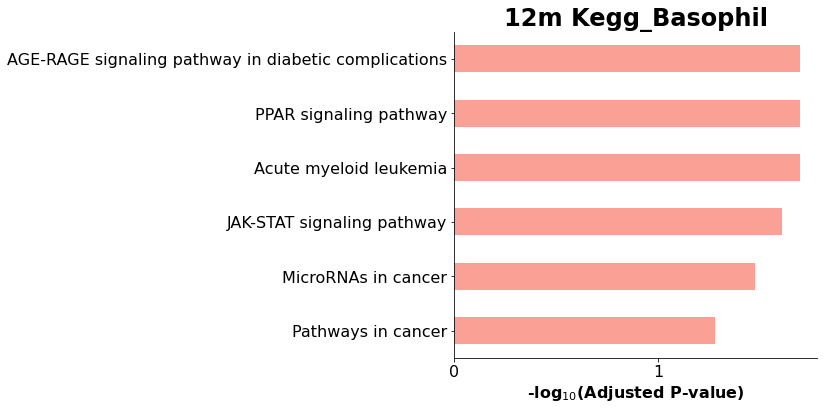

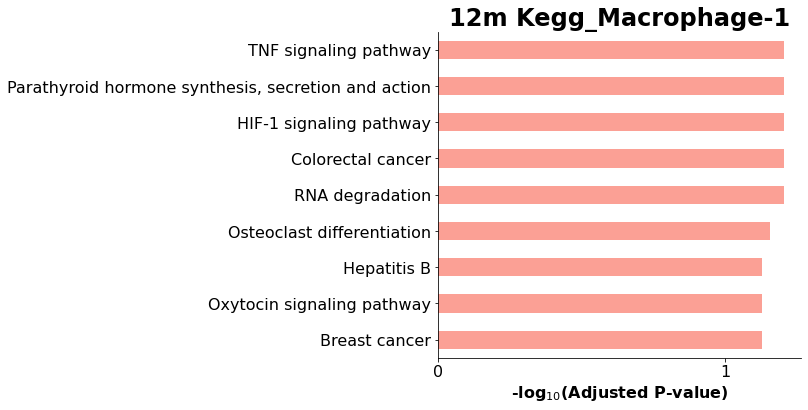

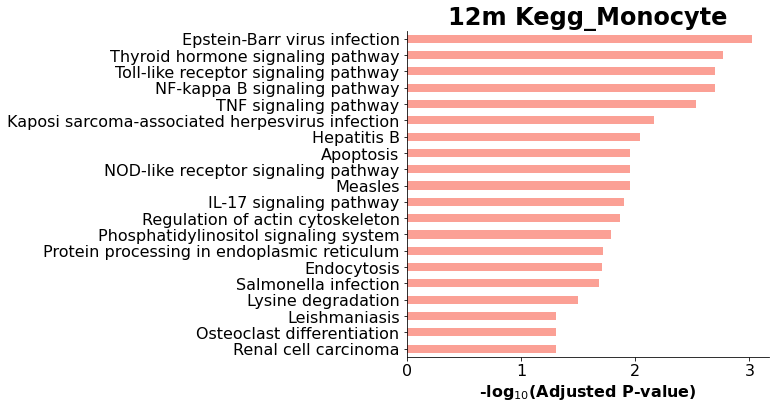

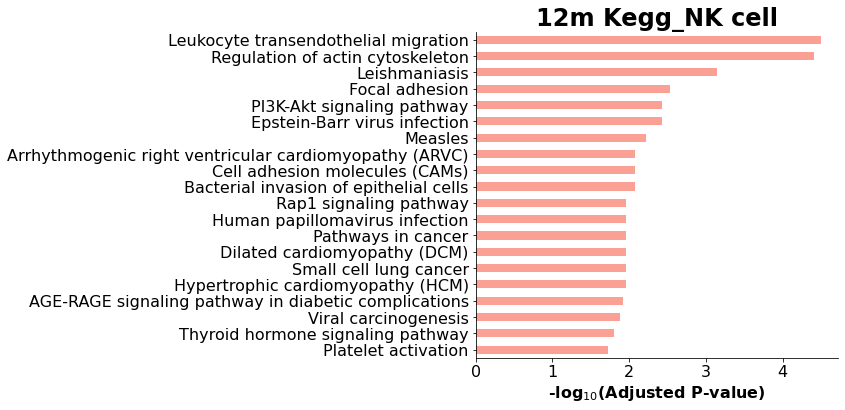

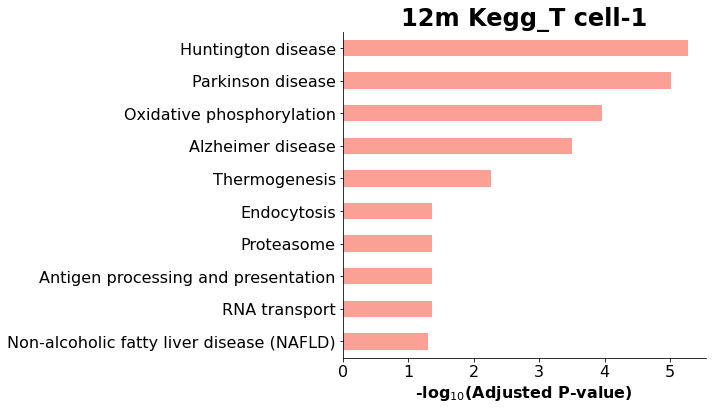

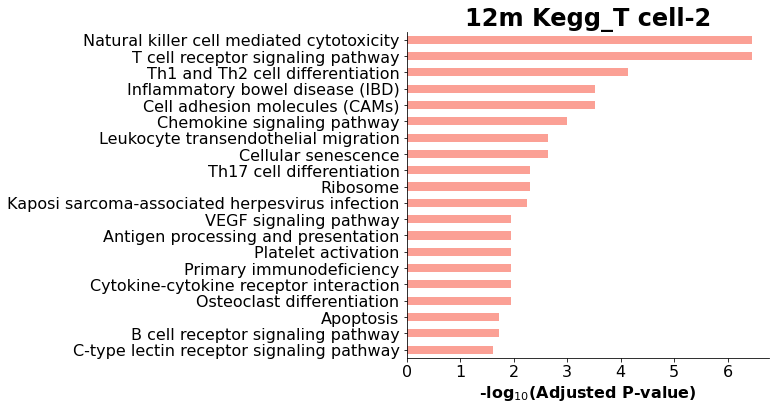

In [10]:
for cell in lo2v12.keys():
    allreverse = (hi2v12[cell]&lo12v3[cell])|(lo2v12[cell]&hi12v3[cell])
    gl=list(allreverse)
    if gl:
        enr=gp.enrichr(gene_list=gl,gene_sets=['KEGG_2019_Mouse'],organism='Mouse',outdir='gsea_test',cutoff=0.5)
        gp.plot.barplot(enr.res2d,title='12m Kegg_'+cell,cutoff=0.1,top_term=20)

# Visualize reversed genes 

In [11]:
cells=list(sorted(adata.obs['cell type'].value_counts().index))

In [12]:
all_gene=[]
all_geneset=set()
for cell in cells:
    #print(len((lo2v12[cell]&hi12v3[cell])|(hi2v12[cell]&lo12v3[cell])))
    ing = (lo2v12[cell]&hi12v3[cell])
    ready = ing-all_geneset
    all_gene+=list(ready)
    all_geneset=all_geneset|ing
    
    ing = (hi2v12[cell]&lo12v3[cell])
    ready = ing-all_geneset
    all_gene+=list(ready)
    all_geneset=all_geneset|ing

447
2
2
0
18
0
319
46
0
0
374
243


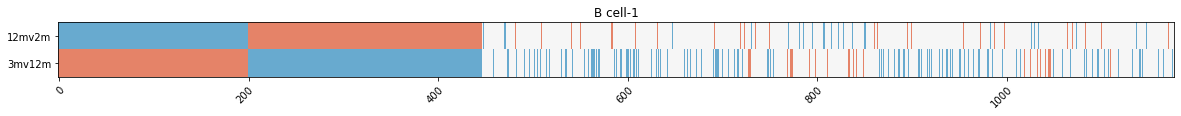

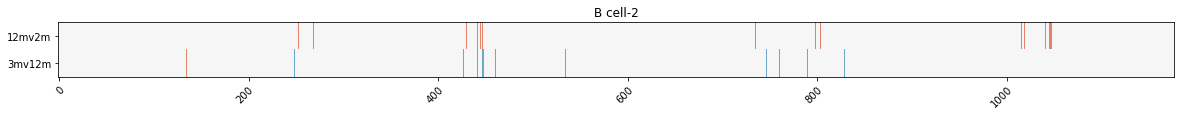

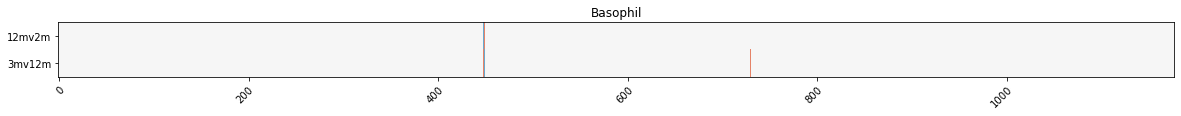

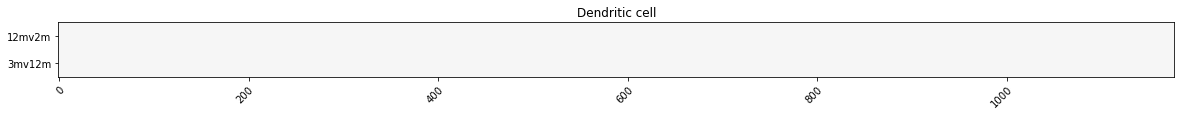

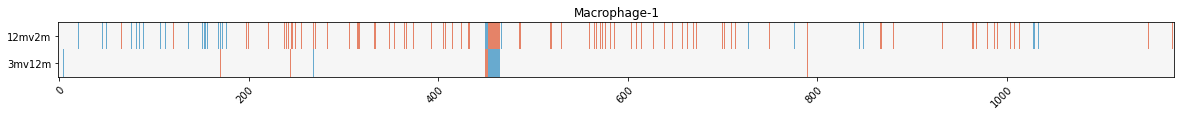

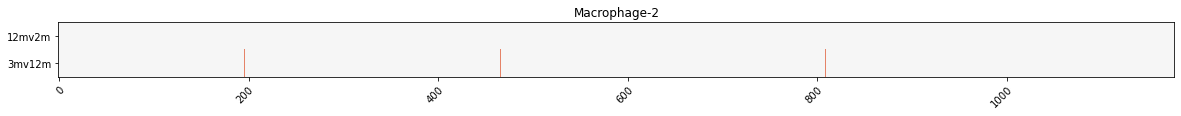

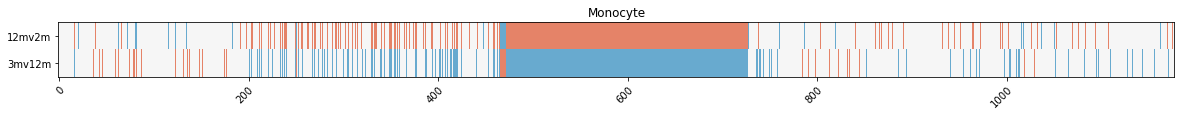

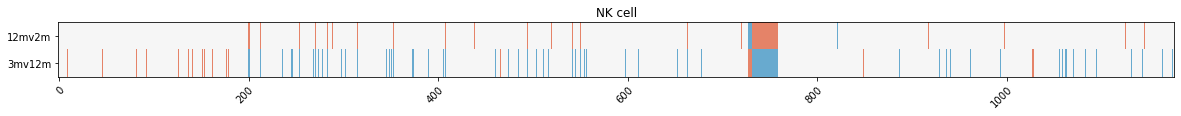

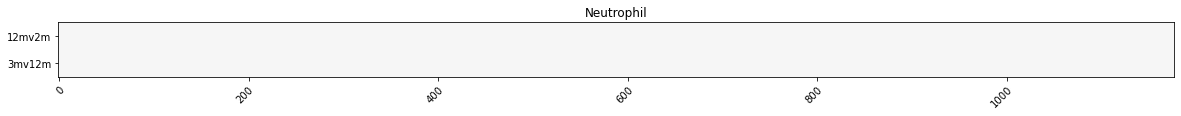

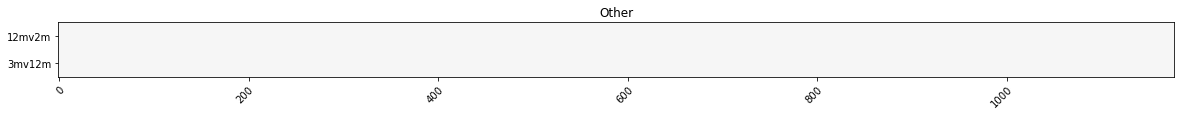

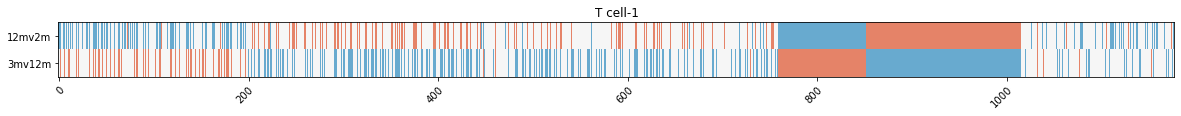

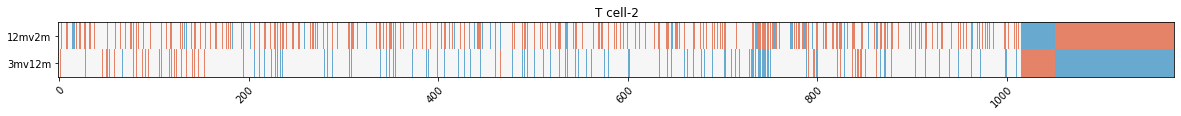

In [15]:
for cell in cells:

    n = len(all_gene)
    data=[[0]*n for _ in range(2)]
    for i,g in enumerate(all_gene):
        if g in lo2v12[cell]:
            data[0][i]=1
        if g in hi2v12[cell]:
            data[0][i]=-1
        if g in hi12v3[cell]:
            data[1][i]=-1
        if g in lo12v3[cell]:
            data[1][i]=1

    fig, ax = plt.subplots(figsize=[20,1])
    im = ax.imshow(data,cmap='RdBu',vmax=2,vmin=-2,interpolation='nearest', aspect='auto')

    # We want to show all ticks...
    #ax.set_xticks(np.arange(len(all_gene)))
    ax.set_yticks(np.arange(2))
    # ... and label them with the respective list entries
    #ax.set_xticklabels(all_gene)
    ax.set_yticklabels(['12mv2m','3mv12m'])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    '''
    # Loop over data dimensions and create text annotations.
    for i in range(len(vegetables)):
        for j in range(len(farmers)):
            text = ax.text(j, i, harvest[i, j],
                           ha="center", va="center", color="w")
    '''

    ax.set_title(cell)
    plt.show()

# KEGG enrich (reversed gene in all cell type)

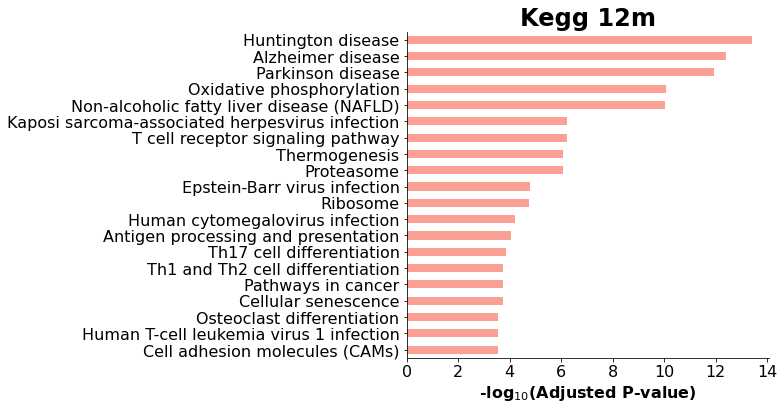

In [17]:
enr = gp.enrichr(gene_list=all_gene,gene_sets=['KEGG_2019_Mouse'],organism='Mouse',outdir='gsea_test',cutoff=0.05)
gp.plot.barplot(enr.res2d,title='Kegg 12m',cutoff=0.05,top_term=20)